In [7]:
from keras.layers import Input, Dense
from keras.models import Model

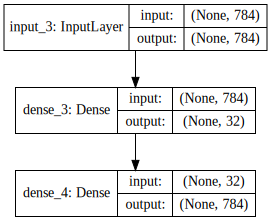

In [8]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

input_img = Input(shape=(784,))

encoded = Dense(encoding_dim,activation='relu')(input_img)

decoded = Dense(784,activation="sigmoid")(encoded)

autoencoder = Model(input = input_img, output=decoded)


encoder = Model(input=input_img,output=encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(autoencoder,show_shapes=True).create(prog='dot', format='svg'))

In [9]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [10]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [5]:
autoencoder.fit(x_train, x_train,
                nb_epoch=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s - loss: 0.3805 - val_loss: 0.2727
Epoch 2/50
60000/60000 [==============================] - 3s - loss: 0.2658 - val_loss: 0.2556
Epoch 3/50
60000/60000 [==============================] - 2s - loss: 0.2453 - val_loss: 0.2331
Epoch 4/50
60000/60000 [==============================] - 2s - loss: 0.2256 - val_loss: 0.2163
Epoch 5/50
60000/60000 [==============================] - 2s - loss: 0.2113 - val_loss: 0.2039
Epoch 6/50
60000/60000 [==============================] - 2s - loss: 0.2002 - val_loss: 0.1939
Epoch 7/50
60000/60000 [==============================] - 2s - loss: 0.1910 - val_loss: 0.1855
Epoch 8/50
60000/60000 [==============================] - 2s - loss: 0.1834 - val_loss: 0.1786
Epoch 9/50
60000/60000 [==============================] - 3s - loss: 0.1772 - val_loss: 0.1730
Epoch 10/50
60000/60000 [==============================] - 2s - loss: 0.1717 - val_loss: 0.1678

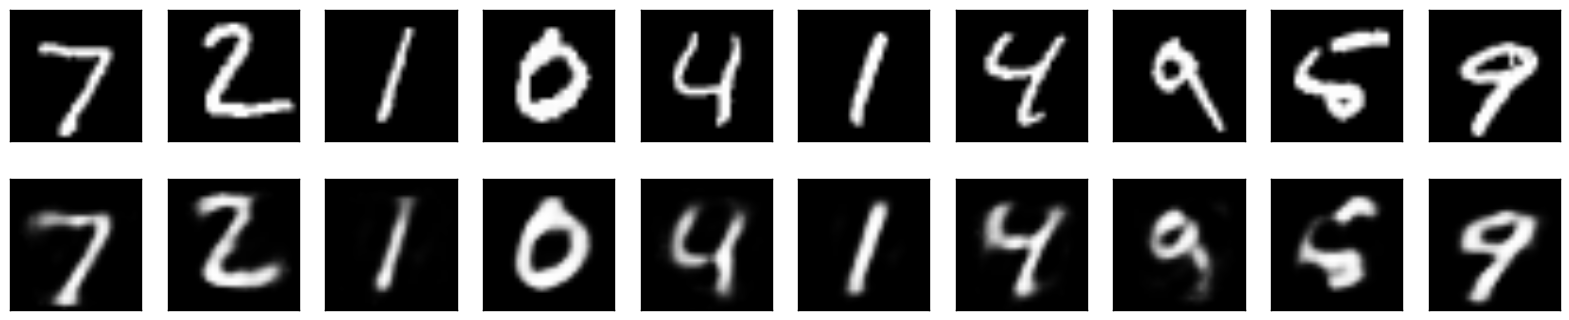

In [8]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# CNN encoder.

In [24]:
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D
from keras.models import Model

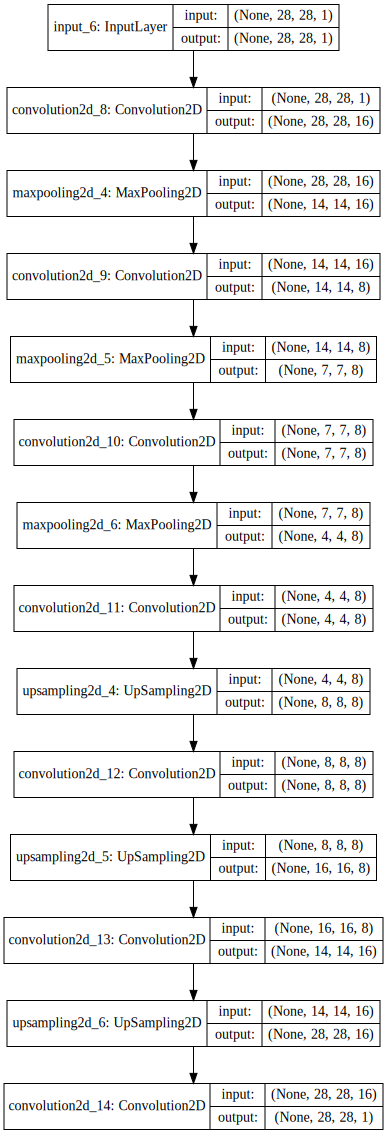

In [25]:
input_img = Input(shape=(28,28,1))
x = Convolution2D(16, 3, 3, activation='relu', border_mode='same')(input_img)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
encoded = MaxPooling2D((2, 2), border_mode='same')(x)

x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(16, 3, 3, activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Convolution2D(1, 3, 3, activation='sigmoid', border_mode='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
SVG(model_to_dot(autoencoder,show_shapes=True).create(prog='dot', format='svg'))

In [26]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28,1))
x_test = np.reshape(x_test, (len(x_test), 28, 28,1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [27]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train_noisy, x_train,
                nb_epoch=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s - loss: 0.2856 - val_loss: 0.2285
Epoch 2/100
60000/60000 [==============================] - 3s - loss: 0.2057 - val_loss: 0.1920
Epoch 3/100
60000/60000 [==============================] - 3s - loss: 0.1823 - val_loss: 0.1724
Epoch 4/100
60000/60000 [==============================] - 3s - loss: 0.1713 - val_loss: 0.1646
Epoch 5/100
60000/60000 [==============================] - 3s - loss: 0.1636 - val_loss: 0.1577
Epoch 6/100
60000/60000 [==============================] - 3s - loss: 0.1583 - val_loss: 0.1551
Epoch 7/100
60000/60000 [==============================] - 3s - loss: 0.1541 - val_loss: 0.1515
Epoch 8/100
60000/60000 [==============================] - 3s - loss: 0.1509 - val_loss: 0.1493
Epoch 9/100
60000/60000 [==============================] - 3s - loss: 0.1482 - val_loss: 0.1488
Epoch 10/100
60000/60000 [==============================] - 3s - loss: 0.1457 - val_lo

(10000, 28, 28, 1)


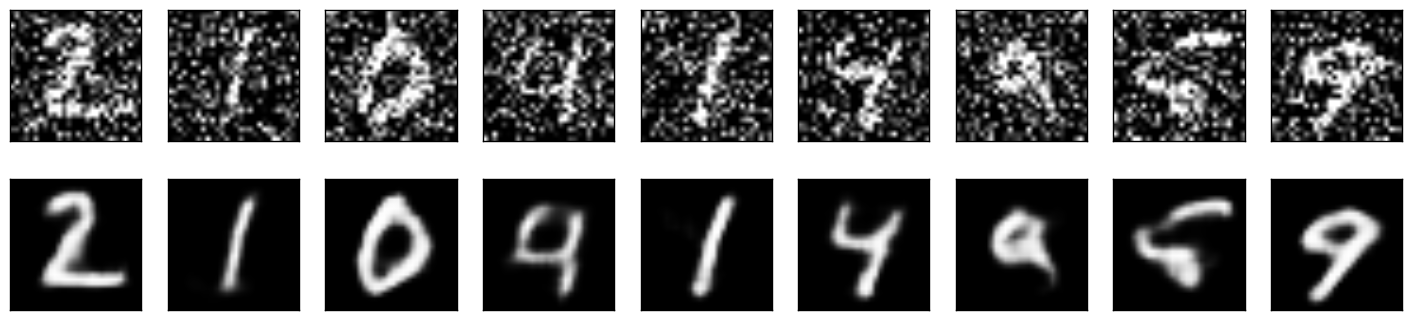

In [28]:
decoded_imgs = autoencoder.predict(x_test_noisy)
print(decoded_imgs.shape)
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()